# CART algorithm for Heart Attack prediction data.


# Data Cleaning and Preprocessing steps

In [1]:
# importing the necessary libraries to get the Decision tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
# import the dataset for Heart data
df = pd.read_csv("/content/heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
# import the dataset for O2 saturation
df1 = pd.read_csv("/content/o2Saturation.csv")
df1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


In [4]:
#Join the DataFrames on the index
df_joined = df.join(df1, how='inner')
#print("Inner Join on Index:\n", joined_df)
df_joined.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [5]:
# Renaming the last merged column
df_clean1 = df_joined.rename({'98.6':'O2'}, axis=1)

In [6]:
df_clean1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,O2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5


In [7]:
# to find null values in the dataset
df_clead1 = df_clean1.isnull().sum()
df_clead1

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
O2          0
dtype: int64

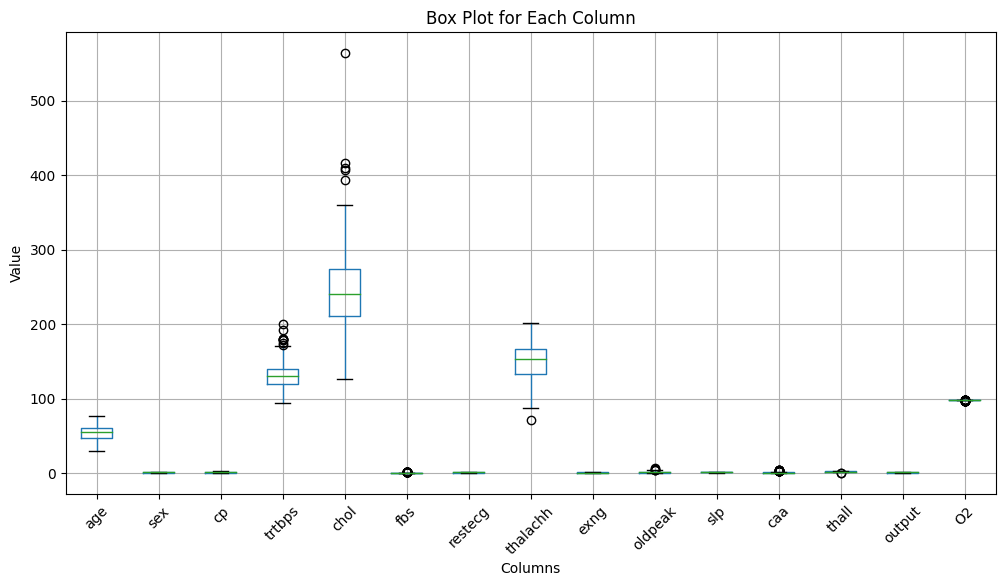

In [8]:
# Create box plots for all columns to detect outliers
plt.figure(figsize=(12, 6))
df_clean1.boxplot()
plt.title('Box Plot for Each Column')
plt.ylabel('Value')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
# finding outliers
n = len(df_clean1)
n
bins = int(np.sqrt(n))
bins


17

In [10]:
num_cols = df_clean1.shape[1]
figsize = (num_cols * 2, 15)  # 5 inches width per plot
figsize


(30, 15)

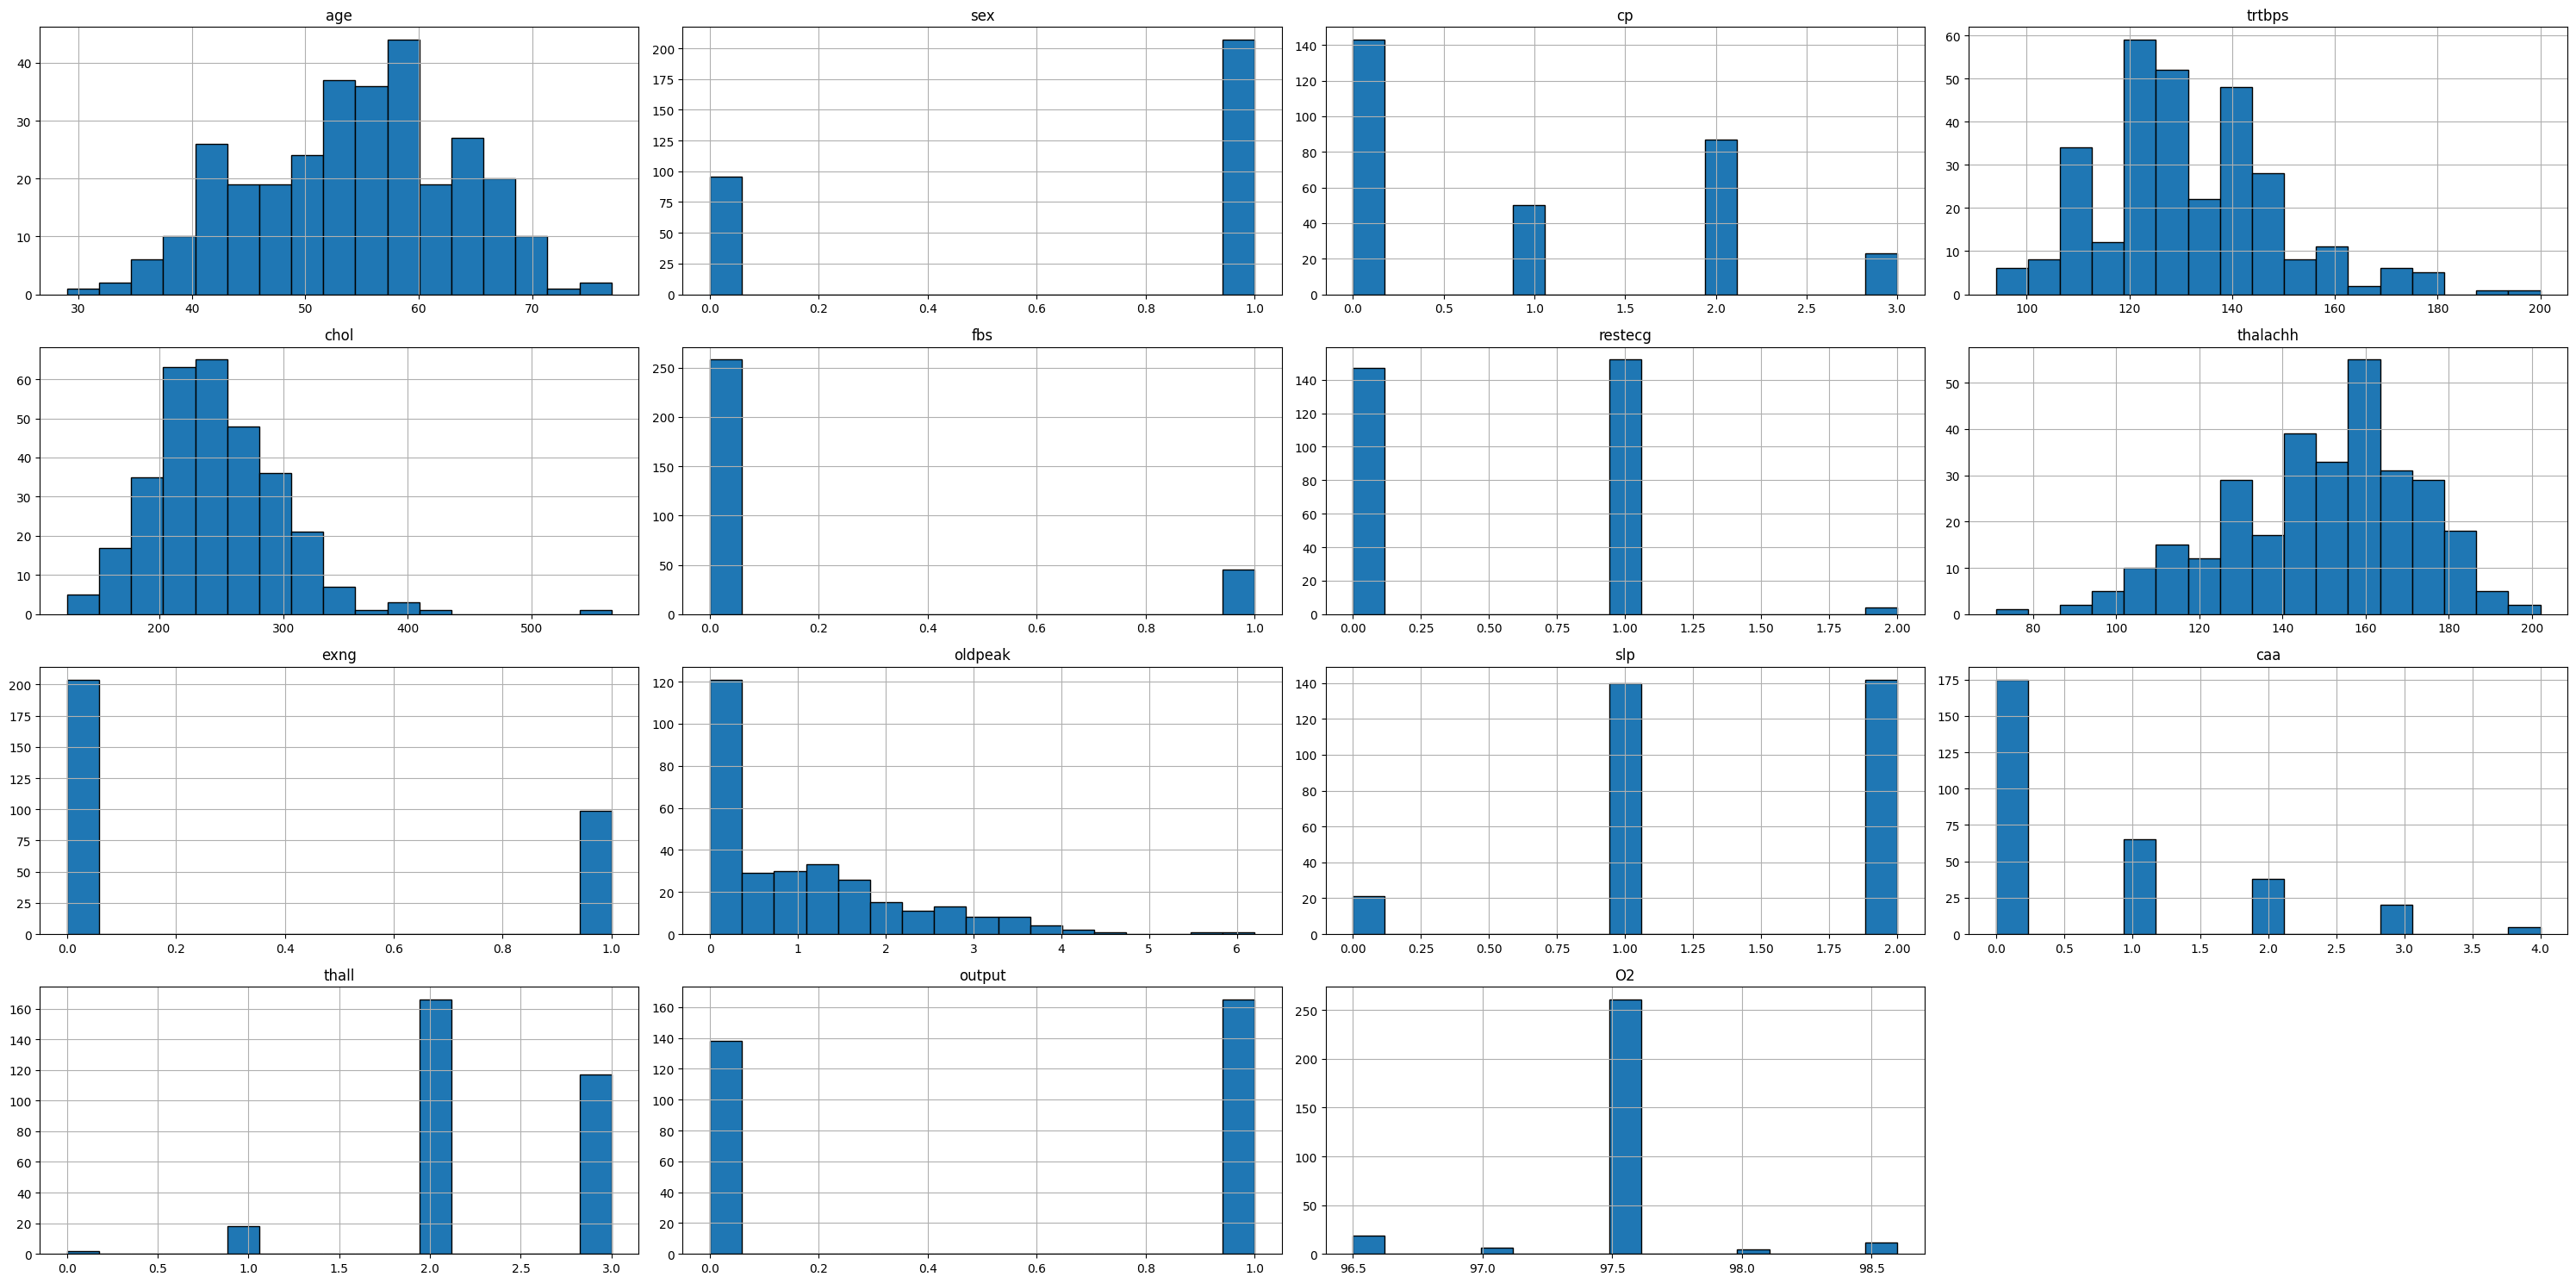

In [11]:
# plotting the histogram for all columns
df_clean1.hist(figsize=figsize, bins=bins, edgecolor='black')
plt.tight_layout()
plt.show()


In [12]:
df_clean1.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'O2'],
      dtype='object')

In [13]:
# Redefining the column to get the target variable feature as the last column
colnames = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'O2', 'output'
 ]
colnames

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'O2',
 'output']

In [14]:
df_clean1 = df_clean1.reindex(columns=colnames)
df_clean1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,O2,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,98.6,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,98.6,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,98.6,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,98.1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,97.5,1


In [15]:
# using the iloc command to separate the predictive features from the target feature.
# defining predictive features as x
x = df_clean1.iloc[:,:-1]
x


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,O2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,97.5


In [16]:
y = df_clean1['output']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [17]:
y.value_counts()

output
1    165
0    138
Name: count, dtype: int64

**Note**: The dataset is imbalnced we should check performance based on precision, recall and F1 score.

In [18]:
# splitting the predictive data in 80% train and 20% test datasets.
#This same configuration of the train-test data can be recalled with the random_state variable set as '1'
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=1)

x_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,O2
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,97.5
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,97.5
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,97.5
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,97.1
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,97.5
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,97.5
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,97.5
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,97.5


In [19]:
y_train

62     1
127    1
111    1
287    0
108    1
      ..
203    0
255    0
72     1
235    0
37     1
Name: output, Length: 242, dtype: int64

# Building Decision Tree Classifier using Entropy Criteria ,using the C.05 model

In [20]:
# Building Decision Tree Classifier using Entropy Criteria ,using the C.05 model
model = DecisionTreeClassifier(criterion = 'entropy',max_depth= 9)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

[Text(0.44901315789473684, 0.95, 'x[2] <= 0.5\nentropy = 0.992\nsamples = 242\nvalue = [108, 134]'),
 Text(0.25, 0.85, 'x[11] <= 0.5\nentropy = 0.815\nsamples = 111\nvalue = [83, 28]'),
 Text(0.13157894736842105, 0.75, 'x[8] <= 0.5\nentropy = 1.0\nsamples = 48\nvalue = [24, 24]'),
 Text(0.05263157894736842, 0.65, 'x[9] <= 0.45\nentropy = 0.634\nsamples = 25\nvalue = [4, 21]'),
 Text(0.02631578947368421, 0.55, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.07894736842105263, 0.55, 'x[1] <= 0.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 8]'),
 Text(0.05263157894736842, 0.45, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.10526315789473684, 0.45, 'x[7] <= 152.0\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.07894736842105263, 0.35, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.13157894736842105, 0.35, 'x[6] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.10526315789473684, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15

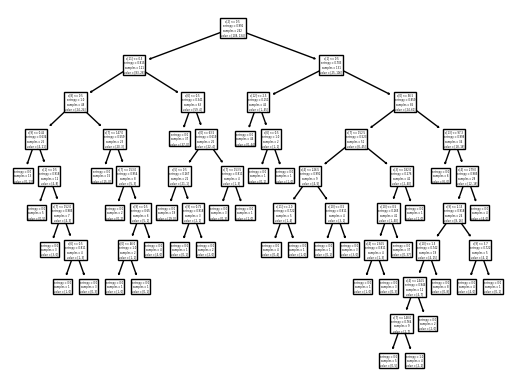

In [21]:
#PLotting the decision tree
tree.plot_tree(model)


In [22]:
y_train.value_counts()


output
1    134
0    108
Name: count, dtype: int64

In [23]:
y.value_counts()

output
1    165
0    138
Name: count, dtype: int64

Above we can see the classification done for the traing dataset. to get the decision tree with original attributes of original features we plot the decision tree again as follows:


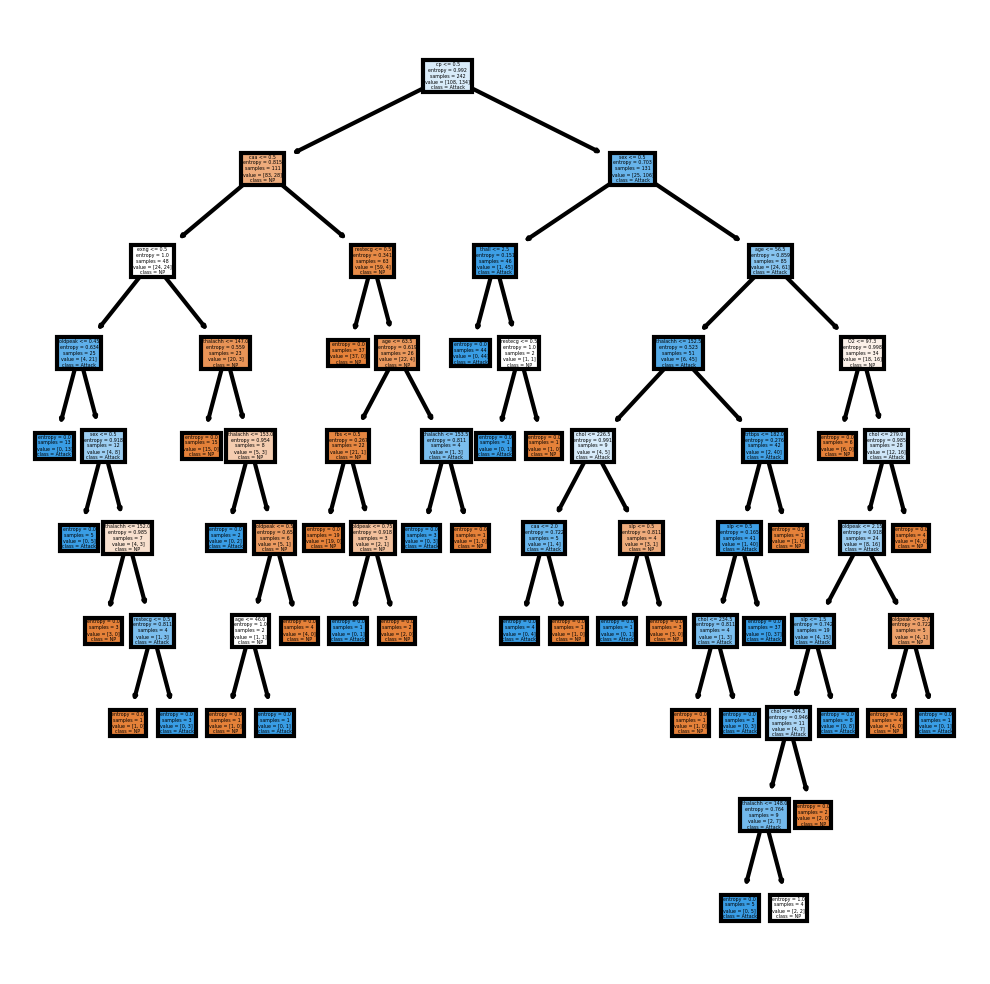

In [24]:
fn=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'O2' ]
cn =['NP','Attack'] # the list of classes is given as 0,1 as per the above result.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [25]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    31
0    30
Name: count, dtype: int64

In [26]:
x_test.shape

(61, 14)

In [27]:
y_test

204    0
159    1
219    0
174    0
184    0
      ..
0      1
288    0
259    0
179    0
110    1
Name: output, Length: 61, dtype: int64

In [28]:
y_test.shape

(61,)

In [29]:
y_test

204    0
159    1
219    0
174    0
184    0
      ..
0      1
288    0
259    0
179    0
110    1
Name: output, Length: 61, dtype: int64

In [30]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,1
output,,
0,22,8
1,8,23


In [31]:
# getting the predictions in a array format to get accuracy
preds

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

In [32]:
preds.shape

(61,)

In [33]:
x_test.shape

(61, 14)

In [34]:
y_test.shape

(61,)

In [35]:
x_train.shape

(242, 14)

In [36]:
y_train.shape

(242,)

In [37]:
# Evaluate the C5.0 model on heart dataset
accuracy = np.mean(preds==y_test)
precision = precision_score(y_test,preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)


In [38]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))




Accuracy: 0.7377049180327869
Precision: 0.7419354838709677
Recall: 0.7419354838709677
F1 Score: 0.7419354838709677
[[22  8]
 [ 8 23]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        30
           1       0.74      0.74      0.74        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



**Inference**: IT is seen that the model accuracy is almost stable at 70% after the 5-8 splits from root node, 73% with 9 splits and decreases with more no of splits.

In [39]:
# To check the test data set after the index 25
y_test_slice = y_test[25:]
y_test_slice

164    1
191    0
80     1
27     1
123    1
157    1
12     1
29     1
59     1
257    0
73     1
150    1
197    0
189    0
95     1
102    1
301    0
138    1
223    0
296    0
182    0
289    0
4      1
283    0
112    1
78     1
188    0
299    0
89     1
16     1
88     1
0      1
288    0
259    0
179    0
110    1
Name: output, dtype: int64

# Building Decision Tree Classifier (CART) using Gini Criteria

In [40]:
### Building Decision Tree Classifier (CART) using Gini Criteria

In [41]:

# Import decision tree classifier from  sklearn library
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [42]:
#Fitting model to the training data
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

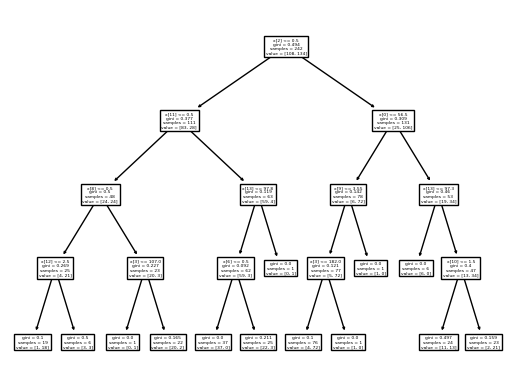

In [43]:
#PLotting the decision tree
tree.plot_tree(model_gini);


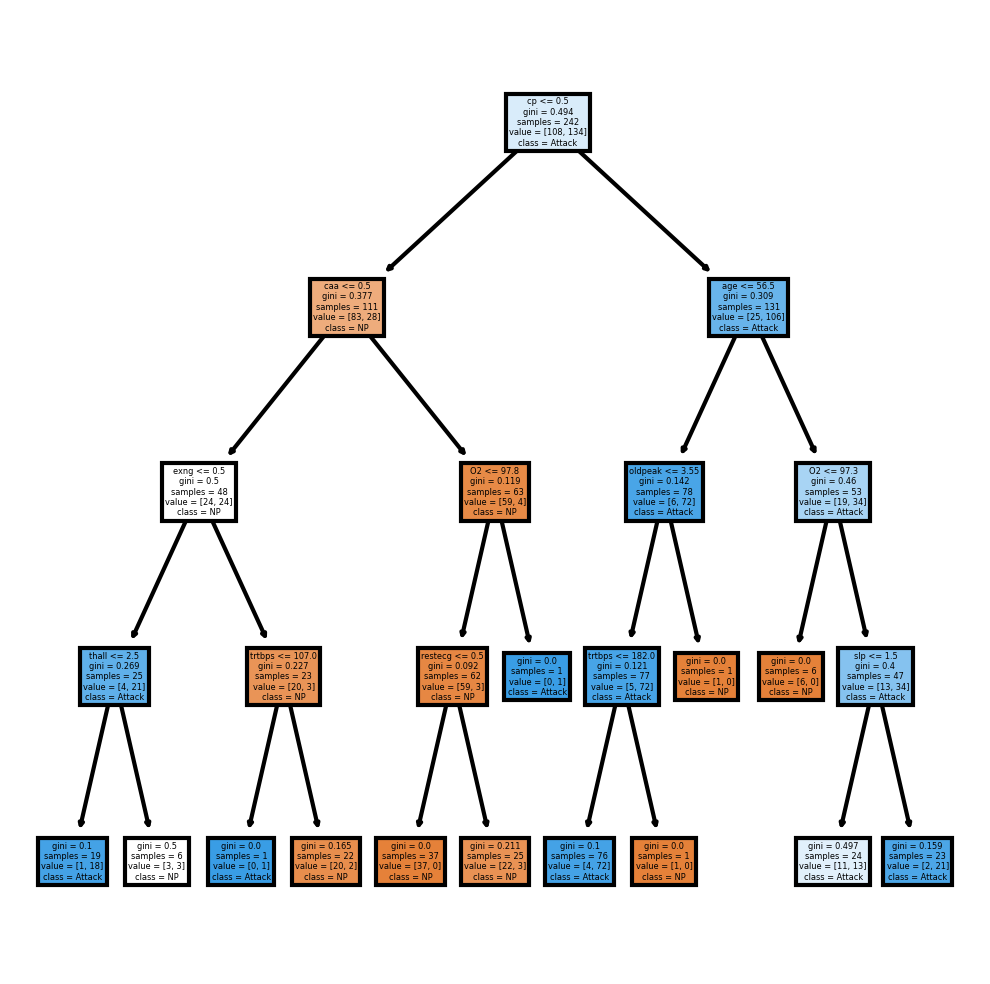

In [44]:
# plotting the tree with actual predictive variables

fn=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'O2' ]
cn =['NP','Attack'] # the list of classes is given as 0,1 as per the previous result.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [45]:
#Predicting on test data
preds_gini = model_gini.predict(x_test) # predicting on test data set
pd.Series(preds_gini).value_counts() # getting the count of each category

1    32
0    29
Name: count, dtype: int64

In [46]:
preds_gini

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

Evaluation of the model

In [47]:
accuracy = np.mean(preds_gini==y_test)
precision = precision_score(y_test,preds_gini)
recall = recall_score(y_test, preds_gini)
f1 = f1_score(y_test, preds_gini)


In [48]:
# Evaluating the CART model on the dataset
print(f'Accuracy_CART: {accuracy}')
print(f'Precision_CART: {precision}')
print(f'Recall_CART: {recall}')
print(f'F1 Score_CART: {f1}')
print(confusion_matrix(y_test, preds_gini))
print(classification_report(y_test, preds_gini))


Accuracy_CART: 0.7540983606557377
Precision_CART: 0.75
Recall_CART: 0.7741935483870968
F1 Score_CART: 0.7619047619047619
[[22  8]
 [ 7 24]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        30
           1       0.75      0.77      0.76        31

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



**Inference**It is seen that the accuracy is max for 4 splits and reduces for more no of splits. but since this is a medical dataset and the accuracy and presion have to high . As this model is averagely able to predict the positive values correctly this model is not suitable for classification as far as prediction of heart attack is concerned.

# Decision Tree Regression


In [49]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [50]:
array = df_clean1.values # there are total 15 features in this dataset with col index from 0-14
X = array[:,0:14] #here we specify the index of the columns (here we say x has all avaues from all rows and from columns with index 0 to 13)
Y= array[:,14] # here we say Y contains the values from all rows and from the column with index no 14(target feature)

In [51]:
X


array([[63. ,  1. ,  3. , ...,  0. ,  1. , 98.6],
       [37. ,  1. ,  2. , ...,  0. ,  2. , 98.6],
       [41. ,  0. ,  1. , ...,  0. ,  2. , 98.6],
       ...,
       [68. ,  1. ,  0. , ...,  2. ,  3. , 97.5],
       [57. ,  1. ,  0. , ...,  1. ,  3. , 97.5],
       [57. ,  0. ,  1. , ...,  1. ,  2. , 97.5]])

In [52]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [53]:
array

array([[63. ,  1. ,  3. , ...,  1. , 98.6,  1. ],
       [37. ,  1. ,  2. , ...,  2. , 98.6,  1. ],
       [41. ,  0. ,  1. , ...,  2. , 98.6,  1. ],
       ...,
       [68. ,  1. ,  0. , ...,  3. , 97.5,  0. ],
       [57. ,  1. ,  0. , ...,  3. , 97.5,  0. ],
       [57. ,  0. ,  1. , ...,  2. , 97.5,  0. ]])

In [54]:
# Splitting the array in train and test dataset with 33 % test data and 77% training data. random_state set to 2 for recalling the same distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [55]:
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train, y_train)

DecisionTreeRegressor()

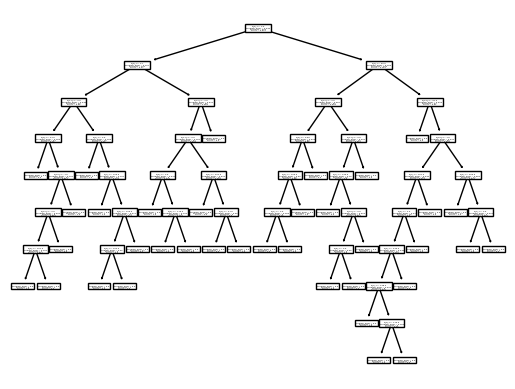

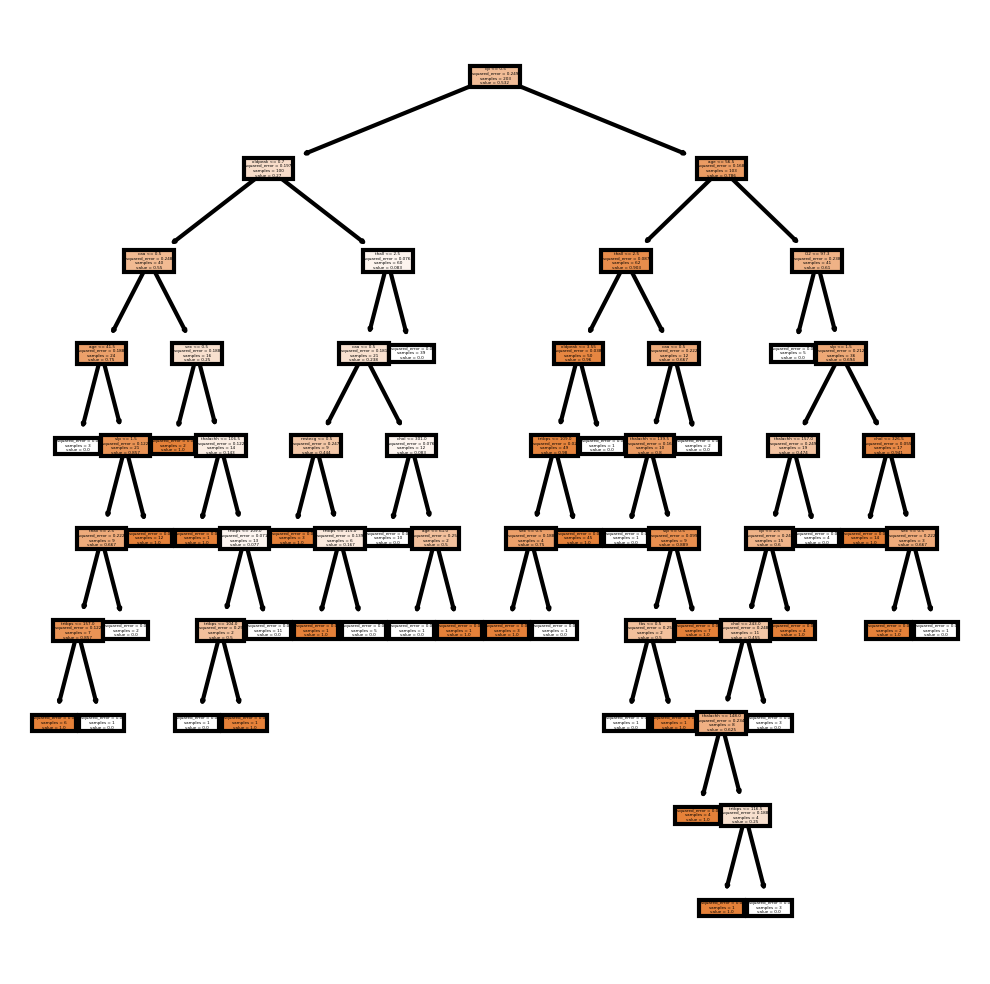

In [56]:
# Plotting the Regression model
tree.plot_tree(model_reg)
fn=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'O2' ]
cn =['NP','Attack'] # the list of classes is given as 0,1 as per the above result.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_reg,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [57]:
#Find the accuracy
model_reg.score(X_test,y_test)

0.3880048959608322

**Inference**IT can be seen that the decision tree regression accuracy is also very poor. THus this approch is not suitable to classify the dataset when we need to predict the heart attack with given parameters.


# Working with correlation approch to get max relevent predictive variables .


To ensure the a good classification we need to approch with correlation matrix amd focus on the featues that precisely and promissingly predict the occurance
of a heart attack.  

In [58]:
array = df_clean1.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)


In [59]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler




In [60]:
#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.71 1.   1.   0.48 0.24 1.   0.   0.6  0.   0.37 0.   0.   0.33 1.
  1.  ]
 [0.17 1.   0.67 0.34 0.28 0.   0.5  0.89 0.   0.56 0.   0.   0.67 1.
  1.  ]
 [0.25 0.   0.33 0.34 0.18 0.   0.   0.77 0.   0.23 1.   0.   0.67 1.
  1.  ]
 [0.56 1.   0.33 0.25 0.25 0.   0.5  0.82 0.   0.13 1.   0.   0.67 0.76
  1.  ]
 [0.58 0.   0.   0.25 0.52 0.   0.5  0.7  1.   0.1  1.   0.   0.67 0.48
  1.  ]]


Standardizing the dataset


In [61]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [62]:
array = df_clean1.values
scaler = StandardScaler().fit(array)
rescaled_df_clean1 = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaled_df_clean1[0:5,:])

[[ 0.95  0.68  1.97  0.76 -0.26  2.39 -1.01  0.02 -0.7   1.09 -2.27 -0.71
  -2.15  3.23  0.91]
 [-1.92  0.68  1.   -0.09  0.07 -0.42  0.9   1.63 -0.7   2.12 -2.27 -0.71
  -0.51  3.23  0.91]
 [-1.47 -1.47  0.03 -0.09 -0.82 -0.42 -1.01  0.98 -0.7   0.31  0.98 -0.71
  -0.51  3.23  0.91]
 [ 0.18  0.68  0.03 -0.66 -0.2  -0.42  0.9   1.24 -0.7  -0.21  0.98 -0.71
  -0.51  1.79  0.91]
 [ 0.29 -1.47 -0.94 -0.66  2.08 -0.42  0.9   0.58  1.44 -0.38  0.98 -0.71
  -0.51  0.06  0.91]]


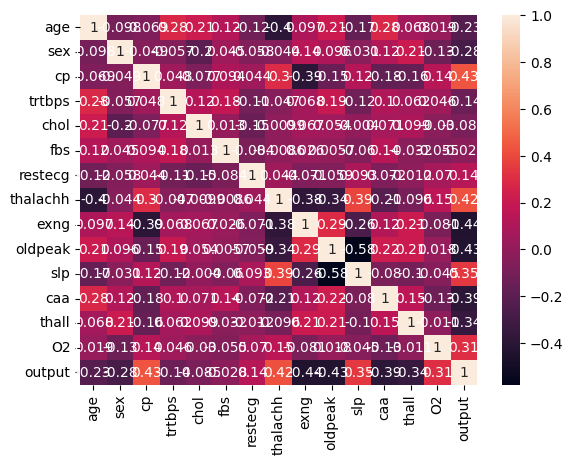

In [63]:
df_clean1.corr()
correlation_matrix = df_clean1.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [64]:
df_clean2 = df_clean1.drop(['age', 'sex', 'trtbps', 'chol', 'fbs', 'restecg',
       'exng', 'oldpeak','caa', 'thall',]
, axis=1)
df_clean2


,cp,thalachh,slp,O2,output
0,3,150,0,98.6,1
1,2,187,0,98.6,1
2,1,172,2,98.6,1
3,1,178,2,98.1,1
4,0,163,2,97.5,1
...,...,...,...,...,...
298,0,123,1,97.5,0
299,3,132,1,97.5,0
300,0,141,1,97.5,0
301,0,115,1,97.5,0


In [65]:
# using the iloc command to separate the predictive features from the target feature.
# defining predictive features as x2
x2 = df_clean2.iloc[:,:-1]
x2


,cp,thalachh,slp,O2
0,3,150,0,98.6
1,2,187,0,98.6
2,1,172,2,98.6
3,1,178,2,98.1
4,0,163,2,97.5
...,...,...,...,...
298,0,123,1,97.5
299,3,132,1,97.5
300,0,141,1,97.5
301,0,115,1,97.5


In [66]:
y2= df_clean2['output']
y2

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [67]:
# splitting the predictive data in 80% train and 20% test datasets.
#This same configuration of the train-test data can be recalled with the random_state variable set as '2'
x_train2, x_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.2,random_state=2)

x_train2

,cp,thalachh,slp,O2
237,0,170,1,97.5
106,3,131,1,97.5
10,0,160,2,97.5
153,2,152,1,97.5
77,1,164,2,97.5
...,...,...,...,...
75,1,161,1,97.5
22,0,178,2,98.6
72,1,202,2,97.5
15,2,158,1,98.1


In [68]:
y_train2

237    0
106    1
10     1
153    1
77     1
      ..
75     1
22     1
72     1
15     1
168    0
Name: output, Length: 242, dtype: int64

In [69]:

# Import decision tree classifier from  sklearn library
from sklearn.tree import DecisionTreeClassifier
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [70]:
#Fitting model to the training data
model_gini2.fit(x_train2, y_train2)

DecisionTreeClassifier(max_depth=3)

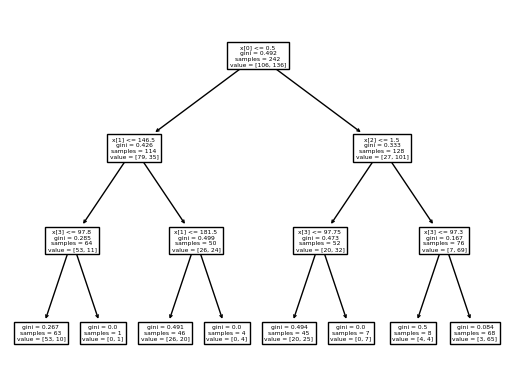

In [71]:
#PLotting the decision tree
tree.plot_tree(model_gini2);


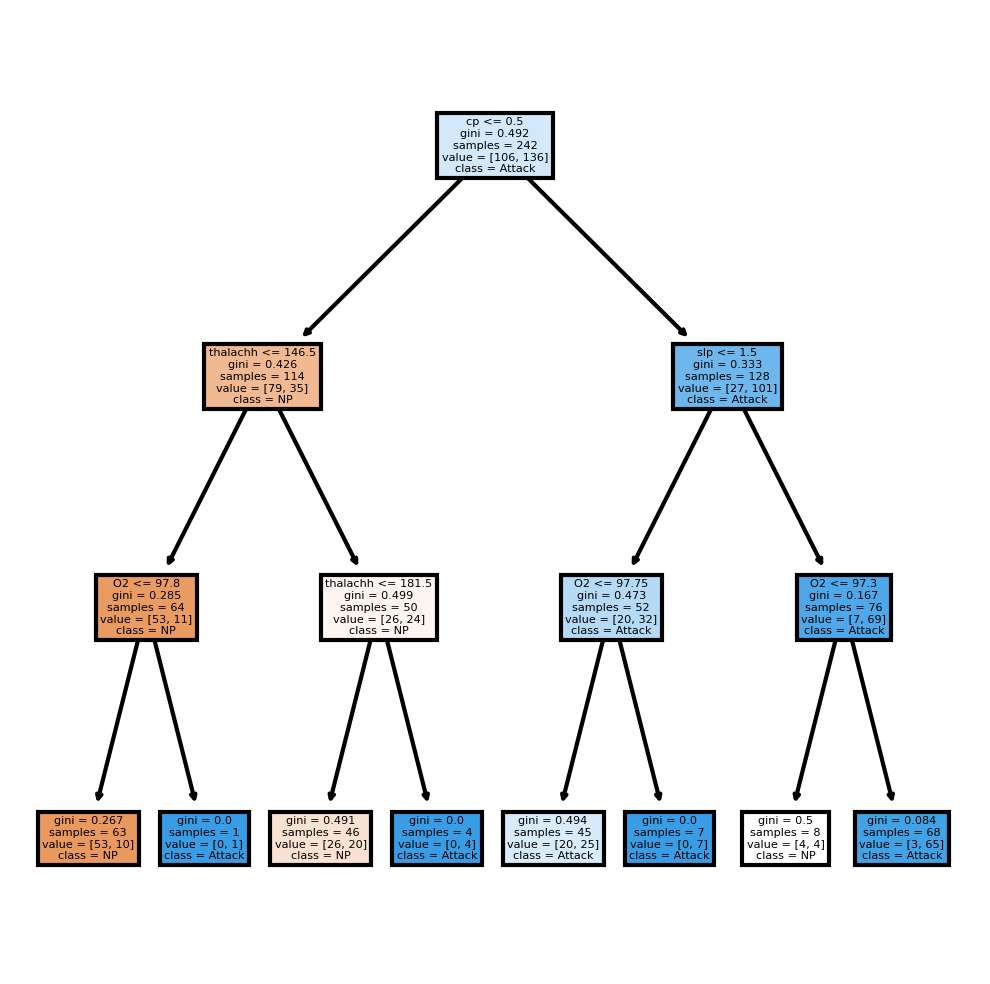

In [72]:
# plotting the tree with actual predictive variables

fn2=['cp', 'thalachh','slp','O2' ]
cn2 =['NP','Attack'] # the list of classes is given as 0,1 as per the previous result.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini2,
               feature_names = fn2,
               class_names=cn2,
               filled = True);

In [73]:
#Predicting on test data
preds_gini2 = model_gini2.predict(x_test2) # predicting on test data set
pd.Series(preds_gini2).value_counts() # getting the count of each category

1    32
0    29
Name: count, dtype: int64

In [74]:
preds_gini2

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [75]:
# Evaluate the CART model on heart dataset after correlation
accuracy_cart_corr = np.mean(preds_gini2==y_test2)
precision_cart_corr = precision_score(y_test2,preds_gini2)
recall_cart_corr = recall_score(y_test2, preds_gini2)
f1_cart_corr = f1_score(y_test2, preds_gini2)


In [76]:
print(f'Accuracy_cart_corr:{accuracy_cart_corr}')
print(f'Precision_cart_corr: {precision_cart_corr}')
print(f'Recall_cart_corr: {recall_cart_corr}')
print(f'F1 Score_cart_corr: {f1_cart_corr}')
# The confusion matrix and classification report for more detailed analysis
print(confusion_matrix(y_test2, preds_gini2))
print(classification_report(y_test2, preds_gini2))

Accuracy_cart_corr:0.8524590163934426
Precision_cart_corr: 0.8125
Recall_cart_corr: 0.896551724137931
F1 Score_cart_corr: 0.8524590163934426
[[26  6]
 [ 3 26]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.90      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



**Inference**Thus we can see that using mostly correlated features we gat an accuracy of 85.24% to predict the hear attack. The precision , recall and F1 scores suggest that this model is best fit in perfomance as the precision is 81.25% .



# Decision Tree Regression applied to the new correlated data output


In [77]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [78]:
array = df_clean2.values # there are total features in this dataset with col index from 0-5
X2 = array[:,0:4] #here we specify the index of the columns (here we say x has all avaues from all rows and from columns with index 0 to 13)
Y2= array[:,4] # here we say Y contains the values from all rows and from the column with index no 14(target feature)

In [79]:
X2

array([[  3. , 150. ,   0. ,  98.6],
       [  2. , 187. ,   0. ,  98.6],
       [  1. , 172. ,   2. ,  98.6],
       ...,
       [  0. , 141. ,   1. ,  97.5],
       [  0. , 115. ,   1. ,  97.5],
       [  1. , 174. ,   1. ,  97.5]])

In [80]:
Y2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [81]:
# Splitting the array in train and test dataset with 33 % test data and 77% training data. random_state set to 4 for recalling the same distribution
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.33, random_state=4)

In [82]:
# Aplying Regression model to the data
model_reg2 = DecisionTreeRegressor()
model_reg2.fit(X2_train, Y2_train)

DecisionTreeRegressor()

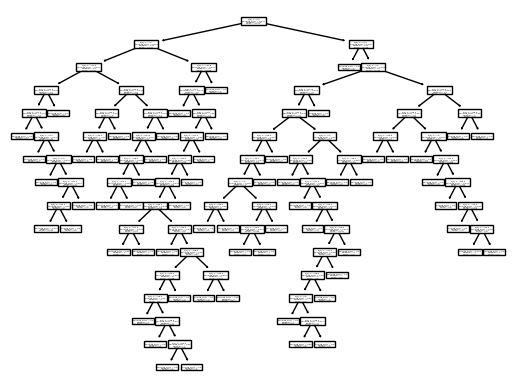

In [83]:
#PLotting the decision tree
tree.plot_tree(model_reg2);


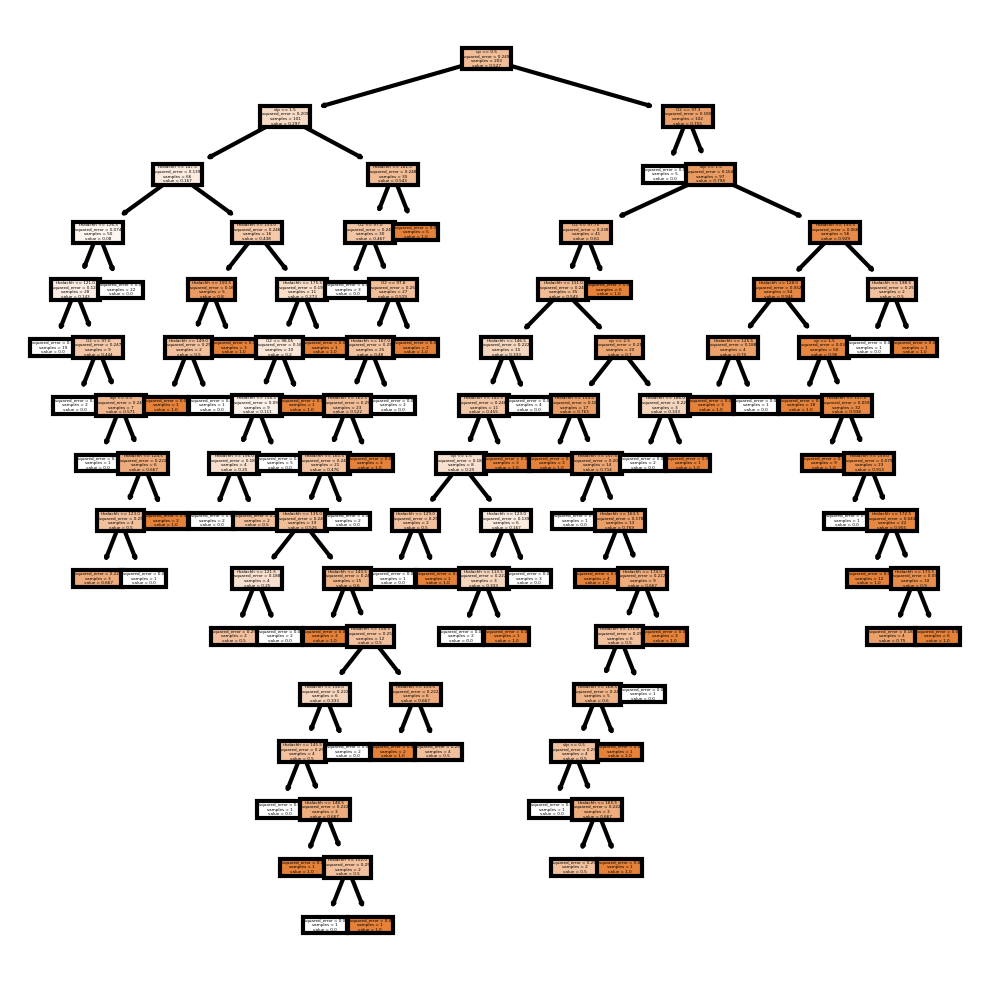

In [84]:
# plotting the tree with actual predictive variables

fn2=['cp', 'thalachh','slp','O2' ]
cn2=['NP','Attack'] # the list of classes is given as 0,1 as per the previous result.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_reg2,
               feature_names = fn2,
               class_names=cn2,
               filled = True);

In [85]:
#Find the accuracy
model_reg2.score(X2_test,Y2_test)

0.030457489509213898

**Inference**:Thus we can see that the Decision Tree Regression score is negative for the new correlated data output.

# Logistic Regression applied to the new correlated data output


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [87]:
model_logi_reg = LogisticRegression()
model_logi_reg.fit(X2_train, Y2_train)
Y2_pred = model_logi_reg.predict(X2_test)

print(f'Accuracy: {accuracy_score(Y2_test, Y2_pred)}')

Accuracy: 0.73


**Inference** :Thus we see that Logistic regression also averagely fits the dataset

# Finding best Hyperparameters and tuning with GridsearchCV also using nested cross validation


In [88]:
# importing the GridsearchCV , and cross validation score library from scikit learn
from sklearn.model_selection import GridSearchCV,cross_val_score

In [89]:
# Defining the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],          # Criterion for splitting
    'splitter': ['best', 'random'],            # Strategy to split at each node
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']     # Number of features to consider when looking for the best split
}


In [90]:
# splitting the predictive data in 80% train and 20% test datasets.
#This same configuration of the train-test data can be recalled with the random_state variable set as '1'
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=1)

x_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,O2
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,97.5
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,97.5
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,97.5
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,97.1
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,97.5
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,97.5
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,97.5
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,97.5


As we have initialised the decision tree earliar as model we continue to setup the grid and fit it to the training data.

In [91]:
# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)


In [92]:
# Set up GridSearchCV
# this is inner loop for hyper parameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
# Fit the model to the training data
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=9),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# Outer loop for model evaluation
nested_score = cross_val_score(grid_search,x_train, y_train, cv=5)
print(f'Nested CV Score: {nested_score.mean()}')
print(f'Average Nested Cross-Validation Score: {np.mean(nested_score)}')
print(f'Standard Deviation of Nested Cross-Validation Scores: {np.std(nested_score)}')


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


Now we can print the best hyper parameters and evaluate the model with help of confusion matrix and F1 score.

In [ ]:
# Print the best parameters and the best score
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)



Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best Score: 0.8434523809523808


In [ ]:
# Evaluate the model
#print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        30
           1       0.76      0.71      0.73        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



Verifying the Model performance by using the best hyper parameters to tune the CART model for the datasets

In [ ]:

# Import decision tree classifier from  sklearn library
from sklearn.tree import DecisionTreeClassifier
model_gini_best= DecisionTreeClassifier(criterion='gini', max_depth = 10,min_samples_leaf=4,min_samples_split=5)

In [ ]:
model_gini_best.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

In [ ]:
tree.plot_tree(model_gini_best);

In [ ]:
# plotting the tree with actual predictive variables

fn=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'O2' ]
cn =['NP','Attack'] # the list of classes is given as 0,1 as per the previous result.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini_best,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds_gini_best = model_gini_best.predict(x_test) # predicting on test data set
pd.Series(preds_gini_best).value_counts() # getting the count of each category

In [ ]:
preds_gini_best

In [ ]:
accuracy = np.mean(preds_gini_best==y_test)
precision = precision_score(y_test,preds_gini_best)
recall = recall_score(y_test, preds_gini_best)
f1 = f1_score(y_test, preds_gini_best)


In [ ]:
# Evaluating the CART model on the dataset
print(f'Accuracy_CART_best: {accuracy}')
print(f'Precision_CART_best: {precision}')
print(f'Recall_CART_best: {recall}')
print(f'F1 Score_CART_best: {f1}')
print(confusion_matrix(y_test, preds_gini))
print(classification_report(y_test, preds_gini))


Consider earlier classification of the dataset where we used only 4 key features to predict the heart attack possiblity. The performance parameters for the same are as follows

In [ ]:
print(f'Accuracy_cart_corr:{accuracy_cart_corr}')
print(f'Precision_cart_corr: {precision_cart_corr}')
print(f'Recall_cart_corr: {recall_cart_corr}')
print(f'F1 Score_cart_corr: {f1_cart_corr}')
# The confusion matrix and classification report for more detailed analysis
print(confusion_matrix(y_test2, preds_gini2))
print(classification_report(y_test2, preds_gini2))

Also as the GridsearchCV inherently uses K fold cross validation technique with k=5, we need not perform cross validation on this dataset separately. but to validate the Correlation Based Model we will use Stratified K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [ ]:
# Set up Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross-Validation
scores = cross_val_score(model_gini2, x2, y2, cv=skf)

# Print Cross-Validation Scores
print(f'Stratified K-Fold Cross-Validation Scores: {scores}')
print(f'Average Stratified K-Fold CV Score: {np.mean(scores)}')
print(f'Standard Deviation of Stratified K-Fold CV Scores: {np.std(scores)}')
Detailed Breakdown

**Inference**: by comparing the confusion matrices of the best fit model(BFM) and the correlation based model we see that. In the correlation based model(CBM).

1) The proportion of predicting the true positive and true negetive values is the same and more that of the best fit model.

2) The FP values for the CBM are less than the BFM.

3)Also the FN values for the CBM are less than the BFM.

 Comparing the Accuracy, Precision and F1 scores of both model

 Accuracy: CBM (0.8524)> BFM(0.7868)

 Precision: CBM(0.8125) < BFM(0.8461)

 Recall: CBM(0.8965) > BFM(0.7096)

 F1 score: CBM(0.8524) > BFM(0.7719)

The averge nested crossvalidation score for the BFM(0.77)shows that the model performs morderately
 **Thus the correlation based model is best suited for classification wrt the given heart dataset.**